### Assessing Algorithmic Bias in Large Language Models' Predictions of Public Opinion Across Demographics
#### We selected a Poll from 2022 from two regions in Canada : British Columbia and Quebec
#### We generated 15 questions which represent opinions of different demographic groups, focusing on age, gender and region.
#### Afterwards,we compare how LLM models like GPT-3.5 and 4 manage to respond to the same questions and how accurate can they represent people's opinions.

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
orig_data = pd.read_csv("../Downloads/Strong Response Analysis - 2022CanadianDemocracyPoll.csv")
gpt3_data = pd.read_csv("../Downloads/Strong Response Analysis - gpt-3.5-turbo.csv")
gpt4_data = pd.read_csv("../Downloads/Strong Response Analysis - gpt-4.csv")



In [8]:
print(orig_data.head())
print(gpt3_data.head())
print(gpt4_data.head())

           location age_group      gender  education_level question_number  \
0  British Columbia     16-25        Male              NaN              Q1   
1  British Columbia     16-25      Female              NaN              Q1   
2  British Columbia     16-25  Non-binary              NaN              Q1   
3  British Columbia     26-35        Male              NaN              Q1   
4  British Columbia     26-35      Female              NaN              Q1   

                                       question_text  \
0  Do you consider yourself to be a strong femini...   
1  Do you consider yourself to be a strong femini...   
2  Do you consider yourself to be a strong femini...   
3  Do you consider yourself to be a strong femini...   
4  Do you consider yourself to be a strong femini...   

                     response  Unnamed: 7  Total N  Strong Responses  \
0           A strong feminist         NaN    720.0             124.0   
1  Not a very strong feminist         NaN      NaN

In [11]:
print(orig_data.info())
print(gpt3_data.info())
print(gpt4_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   location                     720 non-null    object 
 1   age_group                    720 non-null    object 
 2   gender                       720 non-null    object 
 3   education_level              0 non-null      float64
 4   question_number              720 non-null    object 
 5   question_text                720 non-null    object 
 6   response                     720 non-null    object 
 7   Unnamed: 7                   0 non-null      float64
 8   Total N                      1 non-null      float64
 9   Strong Responses             1 non-null      float64
 10  Strong Responses Percentage  1 non-null      object 
dtypes: float64(4), object(7)
memory usage: 62.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data column

In [12]:
print(orig_data['location'].value_counts())
print(orig_data['age_group'].value_counts())
print(orig_data['gender'].value_counts())

British Columbia    360
Quebec              360
Name: location, dtype: int64
66-75     120
26-35     105
46-55     105
16-25      90
36-45      90
56-65      75
76-85      75
86-95      45
96-106     15
Name: age_group, dtype: int64
Male          240
Female        240
Non-binary    240
Name: gender, dtype: int64


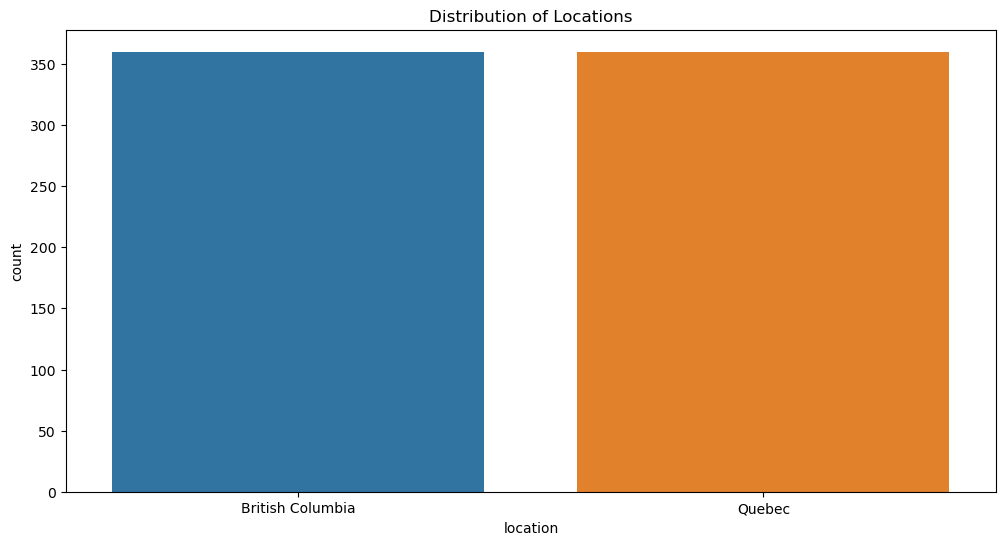

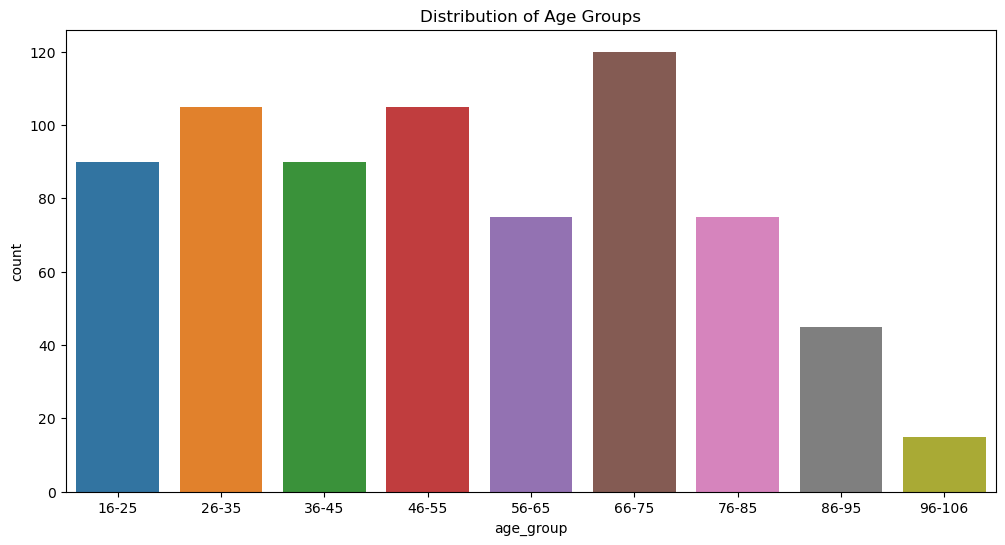

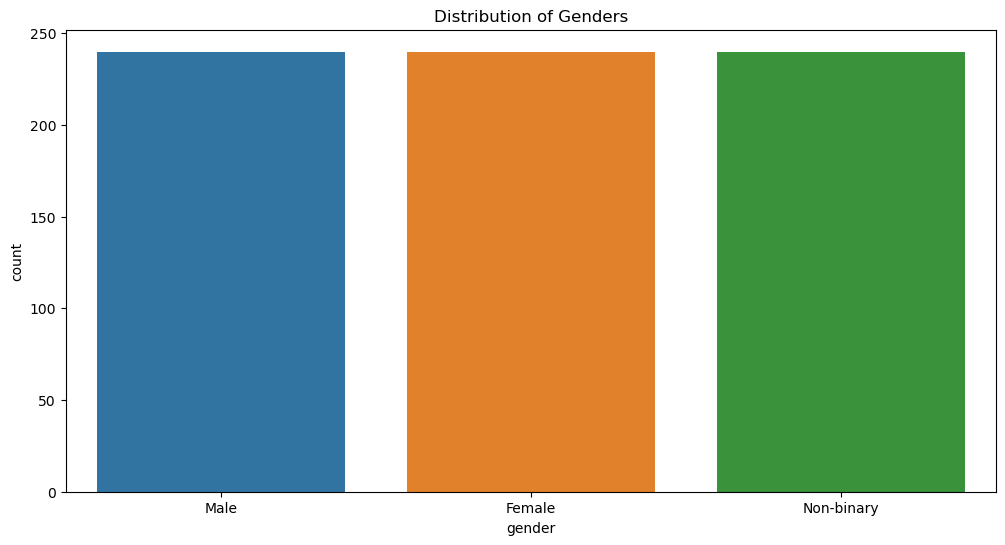

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='location', data=orig_data)
plt.title('Distribution of Locations')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', data=orig_data)
plt.title('Distribution of Age Groups')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='gender', data=orig_data)
plt.title('Distribution of Genders')
plt.show()

In [14]:
for q in orig_data['question_number'].unique():
    print(f"Question {q}:")
    print(orig_data[orig_data['question_number'] == q]['response'].value_counts())
    print()


Question Q1:
A strong feminist             27
Not a very strong feminist    17
Not a feminist at all          4
Name: response, dtype: int64

Question Q2:
Somewhat agree       45
Somewhat disagree     2
Strongly agree        1
Name: response, dtype: int64

Question Q3:
Strongly disagree    29
Somewhat agree       19
Name: response, dtype: int64

Question Q4:
Same number of immigrants    45
More immigrants               2
Fewer immigrants              1
Name: response, dtype: int64

Question Q5:
Somewhat agree       25
Strongly agree       22
Somewhat disagree     1
Name: response, dtype: int64

Question Q6:
Somewhat disagree    27
Somewhat agree       20
Strongly disagree     1
Name: response, dtype: int64

Question Q7:
Somewhat disagree    27
Somewhat agree       19
Strongly disagree     2
Name: response, dtype: int64

Question Q8:
Somewhat agree       34
Somewhat disagree    14
Name: response, dtype: int64

Question Q9:
Somewhat agree       25
Somewhat disagree    15
Strongly agree  

In [39]:
# Iterate through each unique question number
for question_number, group in orig_data.groupby('question_number'):
    # Get the question text from the group
    question_text = group['question_text'].iloc[0]
    # Print the question number and its text
    print(f"Question {question_number}: {question_text}")



Question Q1: Do you consider yourself to be a strong feminist  not a very strong feminist  or not a feminist at all?
Question Q10: The government should leave it entirely to the private sector to create jobs.
Question Q11: Newer lifestyles are contributing to the breakdown of our society.
Question Q12: People like me don't have any say about what the government does.
Question Q13: My ethnicity is an important part of my identity.
Question Q14: Immigrants take jobs away from other Canadians.
Question Q15: The best way to protect women's interests is to have more women in Parliament.
Question Q2: People should be able to say what they think even if it offends some people.
Question Q3: Society would be better off if fewer women worked outside the home.
Question Q4: Do you think Canada should admit more immigrants  less immigrants  or about the same number of immigrants as now?
Question Q5: Politicians are willing to lie to get elected.
Question Q6: I’d rather put my trust in the wisdom of

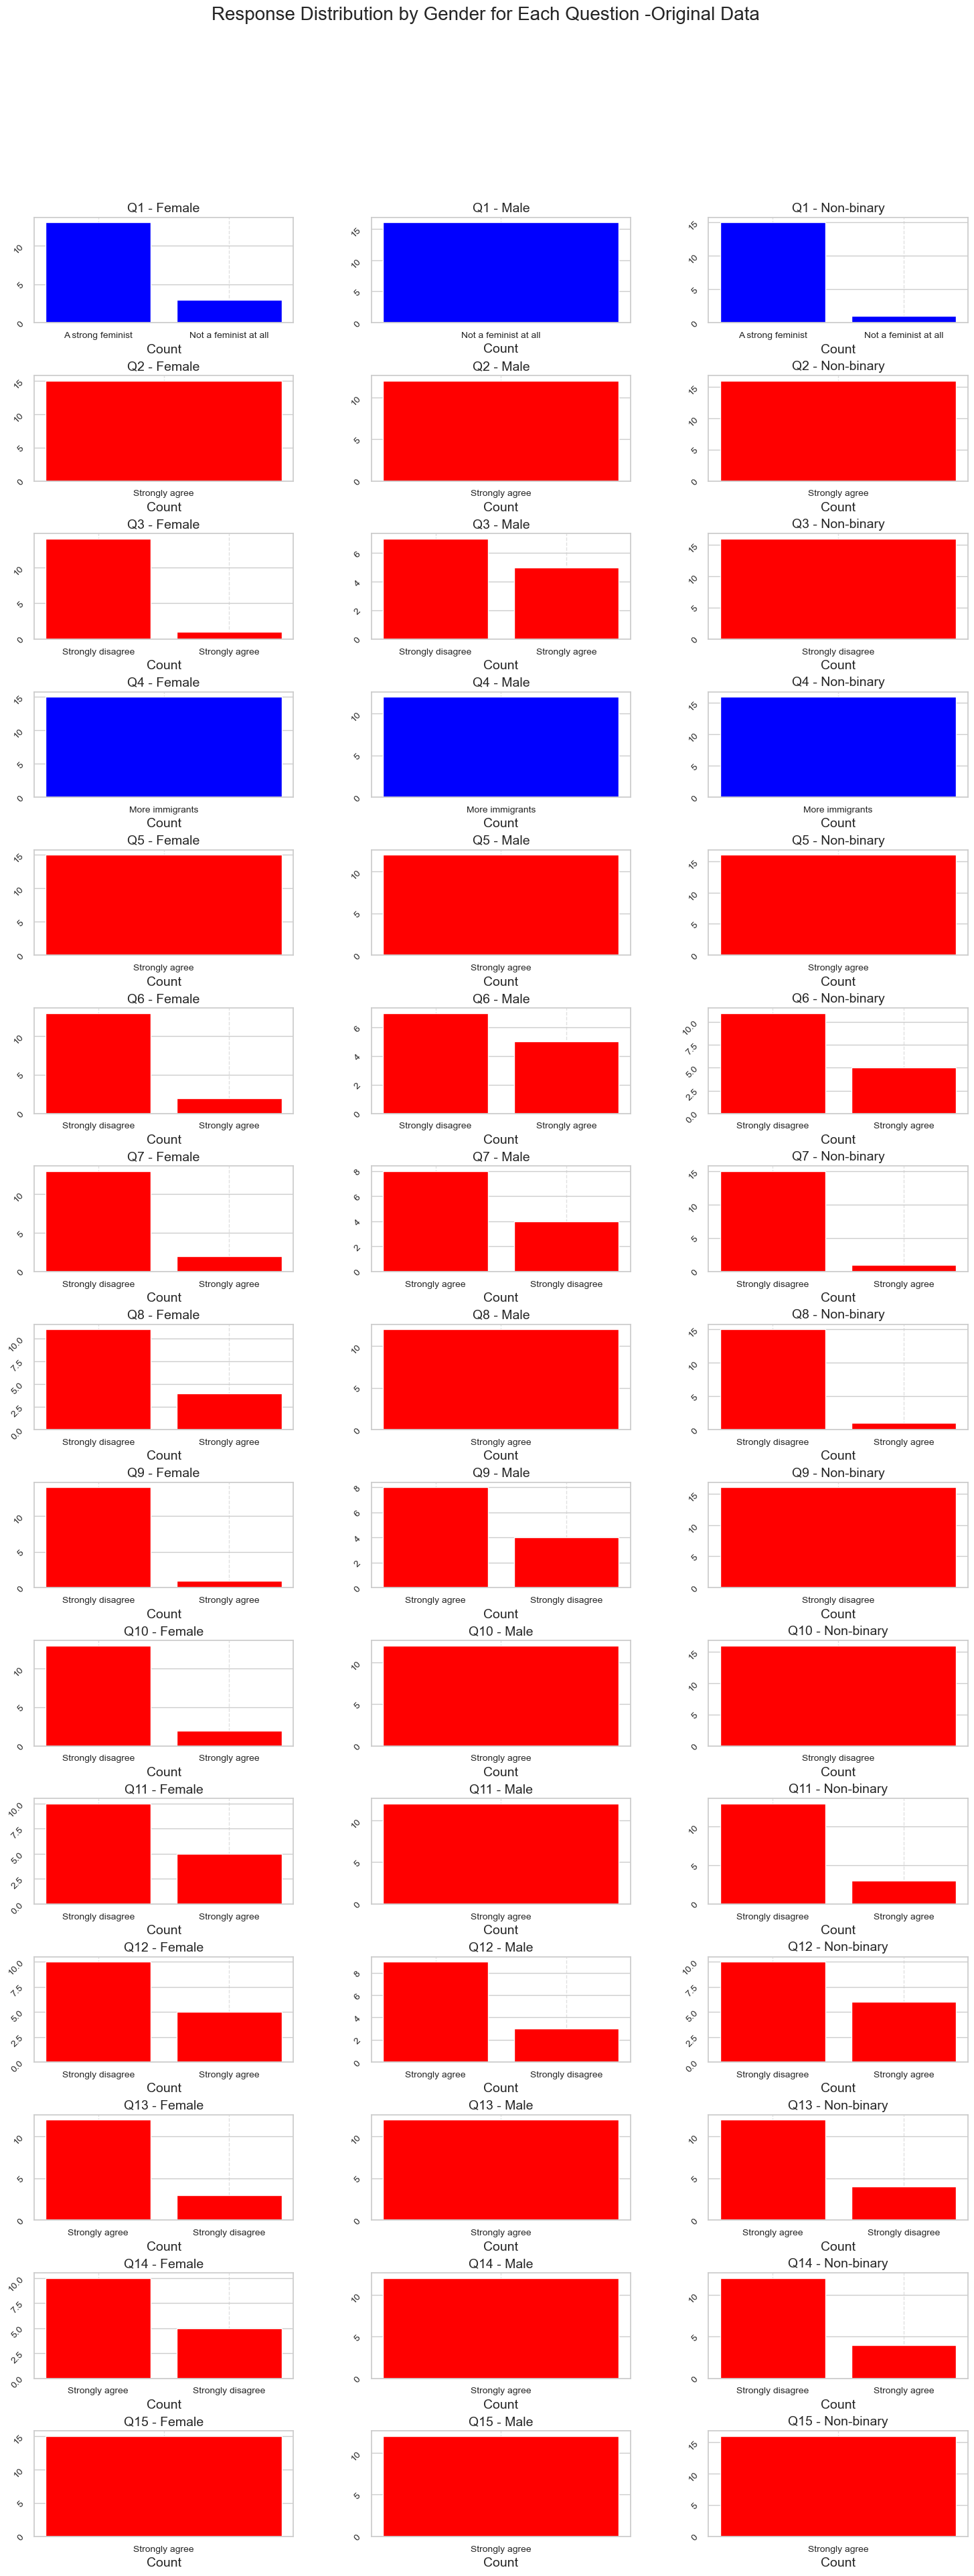

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Get the unique question numbers and genders
question_numbers = orig_data['question_number'].unique()
genders = orig_data['gender'].unique()

# Calculate the number of rows and columns needed for the subplots
n_rows = len(question_numbers)
n_cols = len(genders)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 3))

# Iterate through each unique question number
for i, q in enumerate(question_numbers):
    # Iterate through each gender
    for j, gender in enumerate(genders):
        # Filter data by question number and gender
        data_filtered = orig_data[(orig_data['question_number'] == q) & (orig_data['gender'] == gender)]
        
        # Get the response counts for the current question and gender
        response_counts = data_filtered['response'].value_counts()
        
        # Determine the current subplot
        ax = axes[i, j]
        
        # Create a horizontal bar plot in the current subplot
        # Use a different color for "Strongly agree" or "Strongly disagree" responses
        ax.bar(response_counts.index, response_counts.values, color=['blue' if 'Strongly' not in x else 'red' for x in response_counts.index])
        
        # Set the title and labels
        ax.set_title(f"{q} - {gender}", fontsize=14)
        ax.set_xlabel("Count", fontsize=14)
        
        # Rotate y-axis labels for better readability
        ax.tick_params(axis='y', rotation=45, labelsize=10)
        ax.tick_params(axis='x', labelsize=10)
        
        # Add grid lines
        ax.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Add a title for the entire figure
plt.suptitle("Response Distribution by Gender for Each Question -Original Data", fontsize=20, y=0.95)

# Display the figure
plt.show()



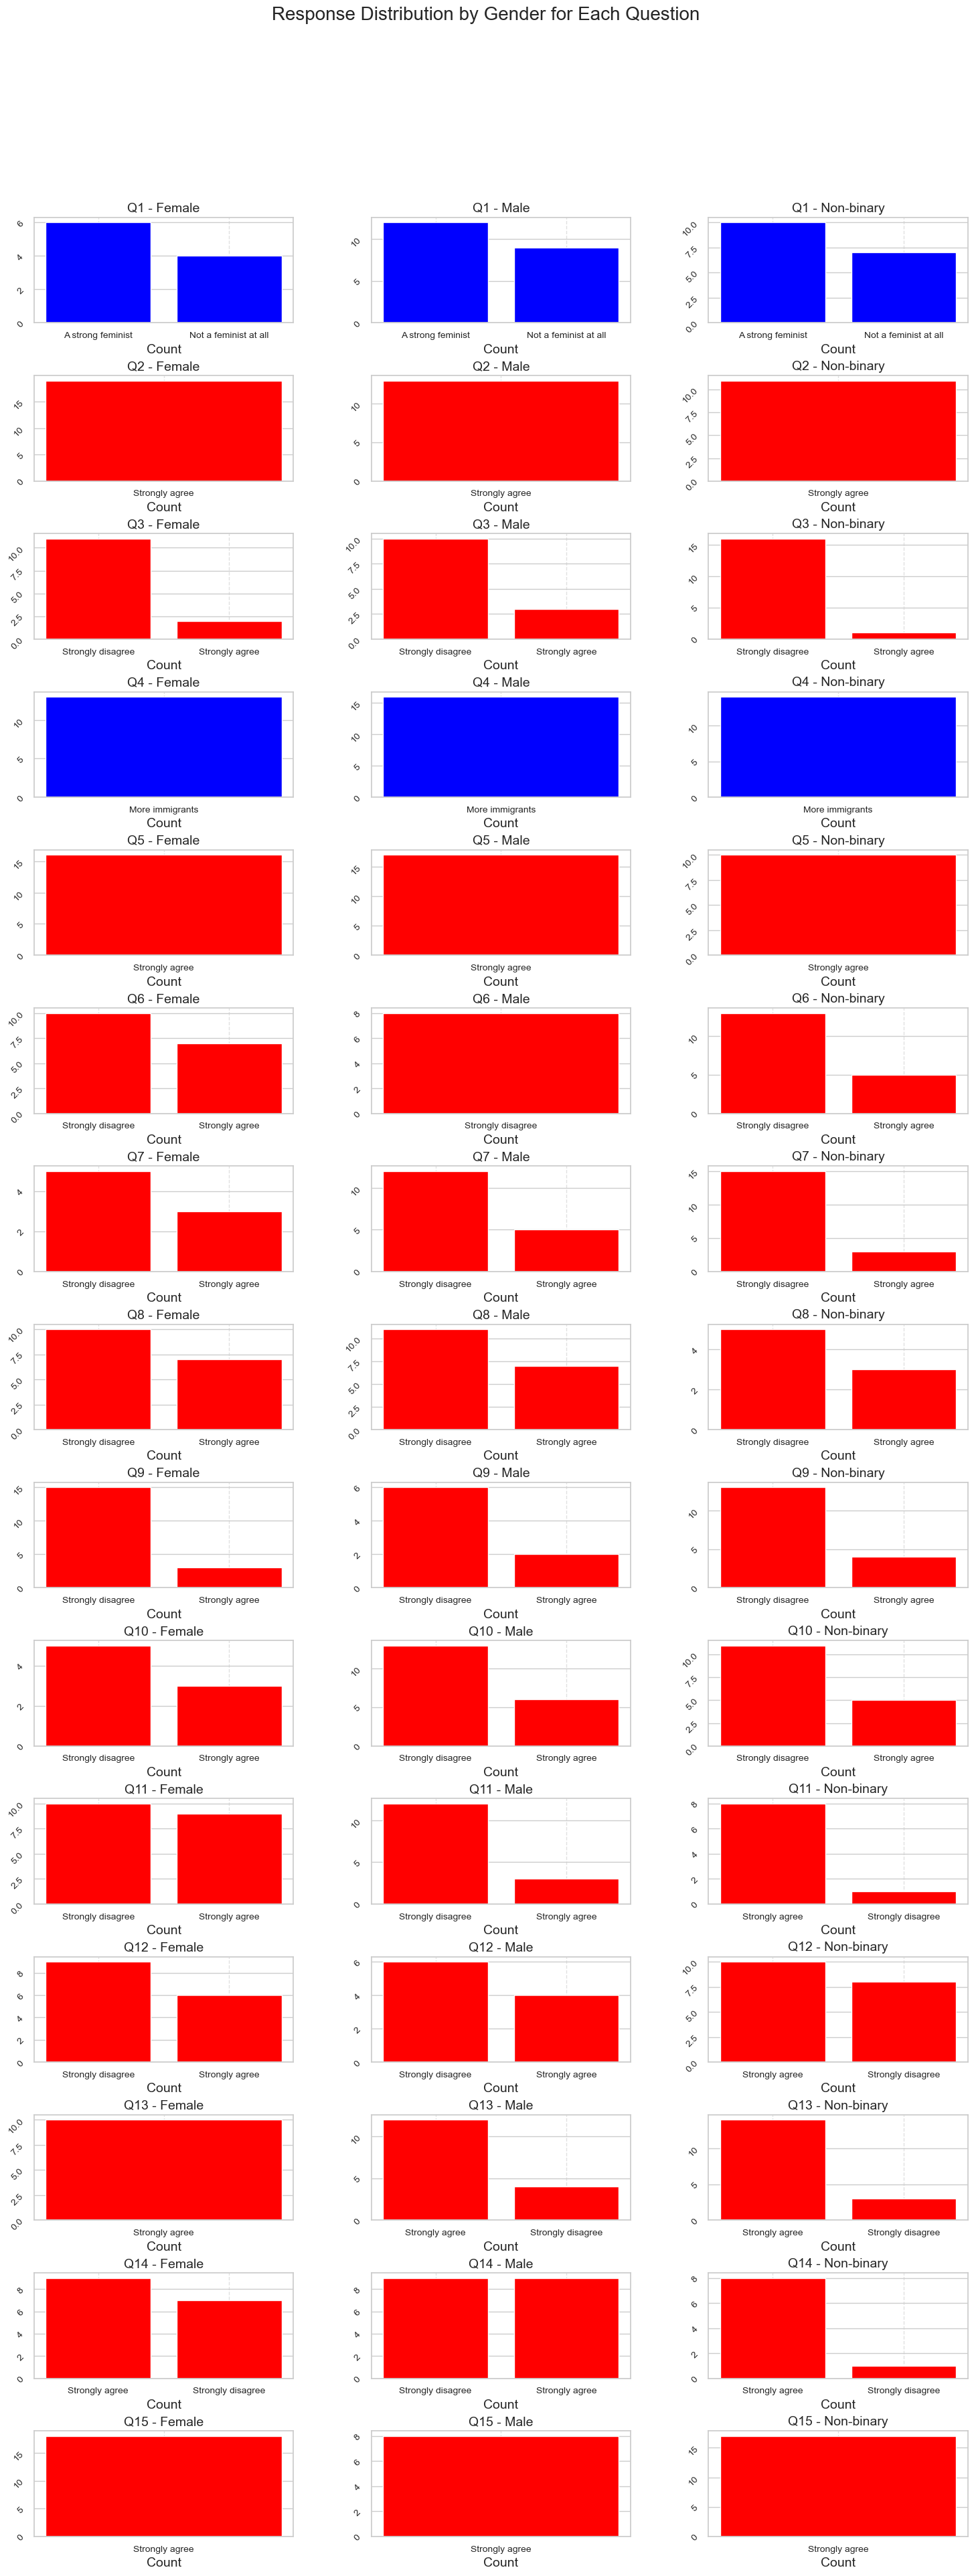

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Get the unique question numbers and genders
question_numbers = gpt3_data['question_number'].unique()
genders = gpt3_data['gender'].unique()

# Calculate the number of rows and columns needed for the subplots
n_rows = len(question_numbers)
n_cols = len(genders)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 3))

# Iterate through each unique question number
for i, q in enumerate(question_numbers):
    # Iterate through each gender
    for j, gender in enumerate(genders):
        # Filter data by question number and gender
        data_filtered = gpt3_data[(gpt3_data['question_number'] == q) & (orig_data['gender'] == gender)]
        
        # Get the response counts for the current question and gender
        response_counts = data_filtered['response'].value_counts()
        
        # Determine the current subplot
        ax = axes[i, j]
        
        # Create a horizontal bar plot in the current subplot
        # Use a different color for "Strongly agree" or "Strongly disagree" responses
        ax.bar(response_counts.index, response_counts.values, color=['blue' if 'Strongly' not in x else 'red' for x in response_counts.index])
        
        # Set the title and labels
        ax.set_title(f"{q} - {gender}", fontsize=14)
        ax.set_xlabel("Count", fontsize=14)
        
        # Rotate y-axis labels for better readability
        ax.tick_params(axis='y', rotation=45, labelsize=10)
        ax.tick_params(axis='x', labelsize=10)
        
        # Add grid lines
        ax.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Add a title for the entire figure
plt.suptitle("Response Distribution by Gender for Each Question -GPT3", fontsize=20, y=0.95)

# Display the figure
plt.show()

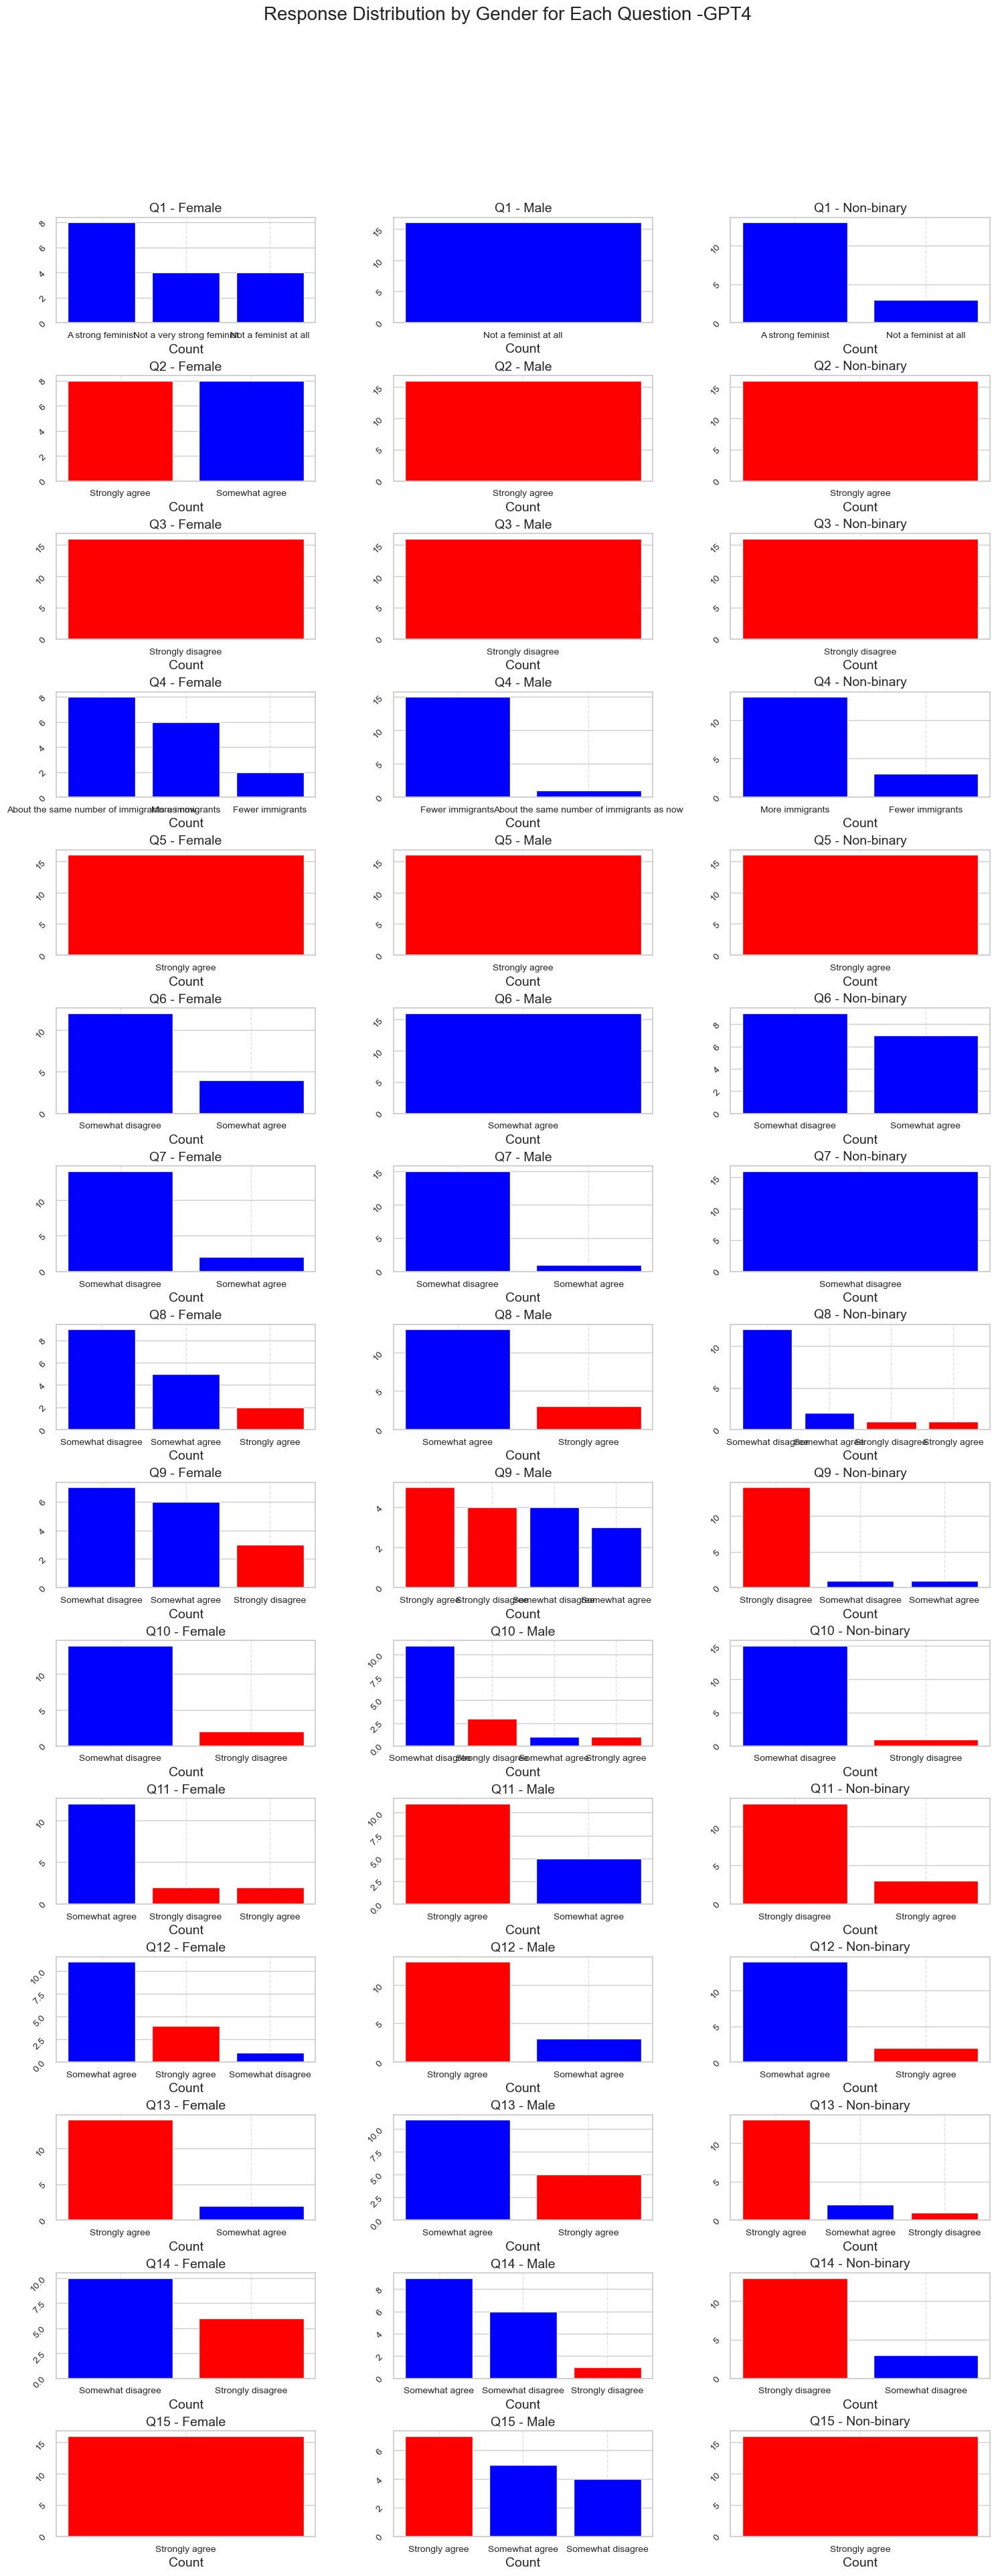

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Get the unique question numbers and genders
question_numbers = gpt4_data['question_number'].unique()
genders = gpt4_data['gender'].unique()

# Calculate the number of rows and columns needed for the subplots
n_rows = len(question_numbers)
n_cols = len(genders)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, n_rows * 3))

# Iterate through each unique question number
for i, q in enumerate(question_numbers):
    # Iterate through each gender
    for j, gender in enumerate(genders):
        # Filter data by question number and gender
        data_filtered = gpt4_data[(gpt4_data['question_number'] == q) & (gpt4_data['gender'] == gender)]
        
        # Get the response counts for the current question and gender
        response_counts = data_filtered['response'].value_counts()
        
        # Determine the current subplot
        ax = axes[i, j]
        
        # Create a horizontal bar plot in the current subplot
        # Use a different color for "Strongly agree" or "Strongly disagree" responses
        ax.bar(response_counts.index, response_counts.values, color=['blue' if 'Strongly' not in x else 'red' for x in response_counts.index])
        
        # Set the title and labels
        ax.set_title(f"{q} - {gender}", fontsize=14)
        ax.set_xlabel("Count", fontsize=14)
        
        # Rotate y-axis labels for better readability
        ax.tick_params(axis='y', rotation=45, labelsize=10)
        ax.tick_params(axis='x', labelsize=10)
        
        # Add grid lines
        ax.grid(True, axis='x', linestyle='--', alpha=0.6)

plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Add a title for the entire figure
plt.suptitle("Response Distribution by Gender for Each Question -GPT4", fontsize=20, y=0.95)

# Display the figure
plt.show()

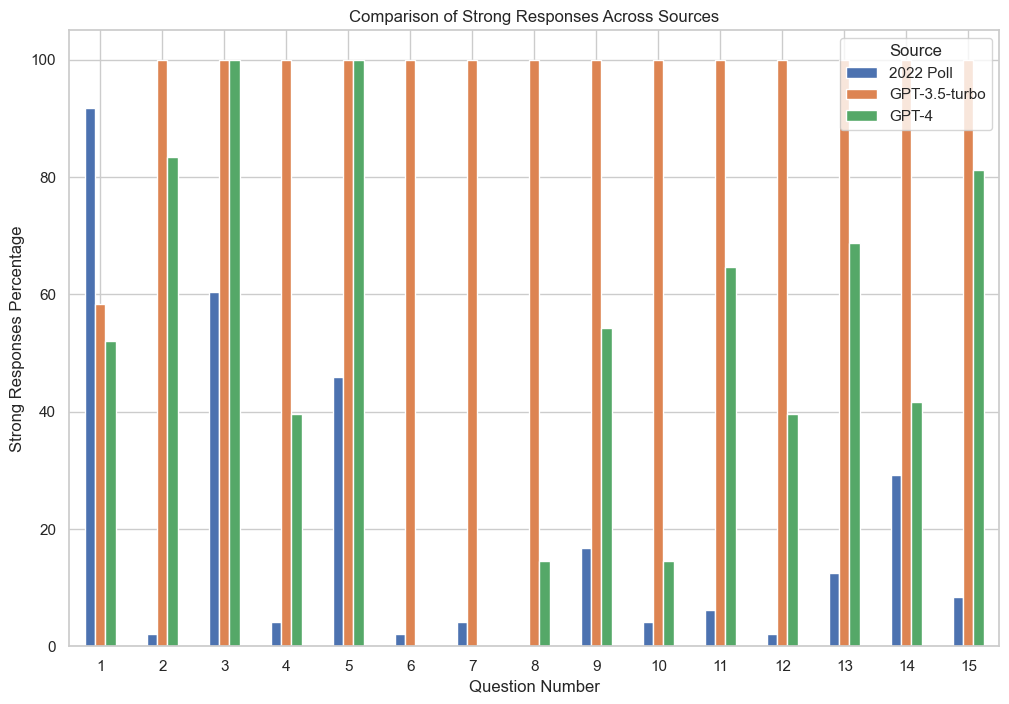

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to calculate the percentage of strong responses
def calculate_strong_response_percentage(data):
    # Define a regular expression pattern to match 'Strong', 'More', or 'Strongly'
    pattern = r'(Strong|More|Strongly)'
    
    # Filter responses containing the pattern
    strong_responses = data[data['response'].str.contains(pattern, na=False, case=False)]
    
    # Calculate total responses for each question
    total_responses = data.groupby('question_number')['response'].count()
    
    # Calculate strong responses for each question
    strong_counts = strong_responses.groupby('question_number')['response'].count()
    
    # Calculate percentage of strong responses
    strong_percentage = (strong_counts / total_responses) * 100
    
    # Return the results as a DataFrame
    return strong_percentage.reset_index().rename(columns={'response': 'strong_percentage'})

# Calculate the percentage of strong responses for each dataset
orig_strong_responses = calculate_strong_response_percentage(orig_data)
gpt3_strong_responses = calculate_strong_response_percentage(gpt3_data)
gpt4_strong_responses = calculate_strong_response_percentage(gpt4_data)

# Merge the data into a single DataFrame for plotting
merged_data = orig_strong_responses.merge(gpt3_strong_responses, on='question_number', suffixes=('_orig', '_gpt3'))
merged_data = merged_data.merge(gpt4_strong_responses, on='question_number')
merged_data.columns = ['question_number', 'strong_percentage_orig', 'strong_percentage_gpt3', 'strong_percentage_gpt4']

# Convert the 'question_number' column from string (e.g., 'Q1') to integer (e.g., 1)
merged_data['question_number'] = merged_data['question_number'].str.extract('(\d+)').astype(int)

# Sort the merged data by 'question_number' to arrange the questions in numerical order
merged_data = merged_data.sort_values(by='question_number')

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))
merged_data.plot(kind='bar', x='question_number', y=['strong_percentage_orig', 'strong_percentage_gpt3', 'strong_percentage_gpt4'], ax=ax)

# Customize plot settings
ax.set_ylabel('Strong Responses Percentage')
ax.set_xlabel('Question Number')
ax.set_title('Comparison of Strong Responses Across Sources')
ax.legend(['2022 Poll', 'GPT-3.5-turbo', 'GPT-4'], title='Source')

# Rotate x-axis labels for better readability
ax.set_xticklabels(merged_data['question_number'], rotation=0)

# Display the plot
plt.show()



In [72]:
# Calculate the total strong responses and total responses for each dataset

# For original data
orig_total_strong_responses = orig_data[orig_data['response'].str.contains(r'(Strong|More|Strongly)', na=False, case=False)]['response'].count()
orig_total_responses = orig_data['response'].count()
orig_total_strong_perception_percentage = (orig_total_strong_responses / orig_total_responses) * 100

# For GPT-3 data
gpt3_total_strong_responses = gpt3_data[gpt3_data['response'].str.contains(r'(Strong|More|Strongly)', na=False, case=False)]['response'].count()
gpt3_total_responses = gpt3_data['response'].count()
gpt3_total_strong_perception_percentage = (gpt3_total_strong_responses / gpt3_total_responses) * 100

# For GPT-4 data
gpt4_total_strong_responses = gpt4_data[gpt4_data['response'].str.contains(r'(Strong|More|Strongly)', na=False, case=False)]['response'].count()
gpt4_total_responses = gpt4_data['response'].count()
gpt4_total_strong_perception_percentage = (gpt4_total_strong_responses / gpt4_total_responses) * 100

# Print the total strong perception percentage for each dataset
print(f"Total Strong Perception Percentage for 2022 Poll: {orig_total_strong_perception_percentage:.2f}%")
print(f"Total Strong Perception Percentage for GPT-3.5-turbo: {gpt3_total_strong_perception_percentage:.2f}%")
print(f"Total Strong Perception Percentage for GPT-4: {gpt4_total_strong_perception_percentage:.2f}%")


Total Strong Perception Percentage for 2022 Poll: 19.31%
Total Strong Perception Percentage for GPT-3.5-turbo: 96.92%
Total Strong Perception Percentage for GPT-4: 50.28%


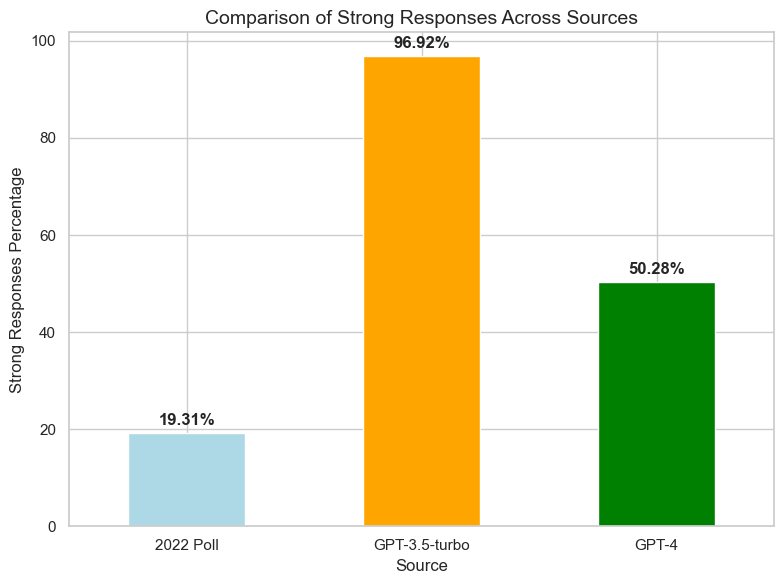

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data from the images
data1 = pd.DataFrame({'Source': ['2022 Poll'], 'Strong Responses Percentage': [19.31]})
data2 = pd.DataFrame({'Source': ['GPT-4'], 'Strong Responses Percentage': [50.28]})
data3 = pd.DataFrame({'Source': ['GPT-3.5-turbo'], 'Strong Responses Percentage': [96.92]})

# Combine the data
data = pd.concat([data1, data2, data3], ignore_index=True)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(8, 6))
ax = data.groupby('Source')['Strong Responses Percentage'].mean().plot(kind='bar', rot=0, color=['lightblue', 'orange', 'green'])
ax.set_xlabel('Source', fontsize=12)
ax.set_ylabel('Strong Responses Percentage', fontsize=12)
ax.set_title('Comparison of Strong Responses Across Sources', fontsize=14)

# Add data labels on top of bars
for i, v in enumerate(data.groupby('Source')['Strong Responses Percentage'].mean()):
    ax.text(i, v + 1, str(round(v, 2)) + '%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

Confidence Interval for 2022 Poll Strong Perception: (6.433207143706516, 34.935840475341095)
Confidence Interval for GPT-3.5-turbo Strong Perception: (91.77777777777779, 102.66666666666667)
Confidence Interval for GPT-4 Strong Perception: (42.61004721841387, 73.41559380722717)
T-test between 2022 Poll and GPT-3.5-turbo: TtestResult(statistic=nan, pvalue=nan, df=nan)
T-test between 2022 Poll and GPT-4: TtestResult(statistic=nan, pvalue=nan, df=nan)


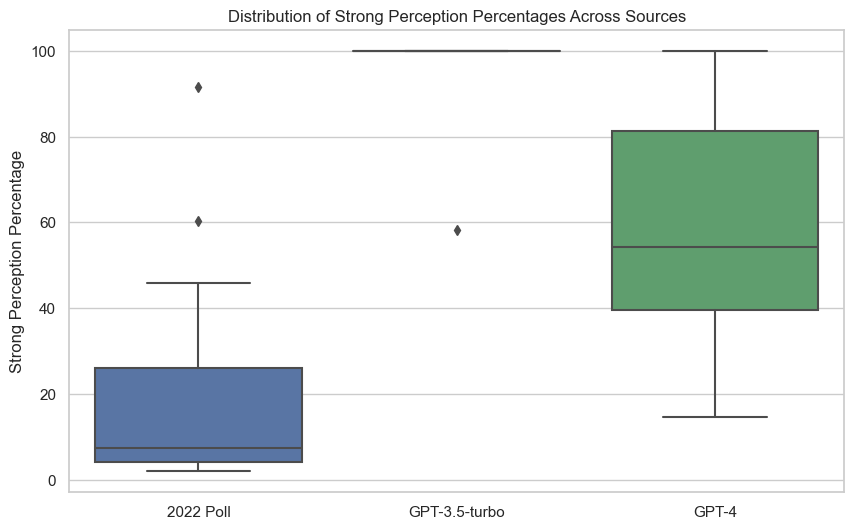

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns

# Calculate the confidence intervals for the strong perception percentages
def calculate_confidence_interval(data, confidence=0.95):
    mean = data.mean()
    sem = data.sem()
    interval = sem * 1.96  # 1.96 for 95% confidence
    return mean - interval, mean + interval

# Calculate confidence intervals
orig_confidence_interval = calculate_confidence_interval(orig_strong_responses['strong_percentage'])
gpt3_confidence_interval = calculate_confidence_interval(gpt3_strong_responses['strong_percentage'])
gpt4_confidence_interval = calculate_confidence_interval(gpt4_strong_responses['strong_percentage'])

print(f"Confidence Interval for 2022 Poll Strong Perception: {orig_confidence_interval}")
print(f"Confidence Interval for GPT-3.5-turbo Strong Perception: {gpt3_confidence_interval}")
print(f"Confidence Interval for GPT-4 Strong Perception: {gpt4_confidence_interval}")

# Perform hypothesis testing (t-test) to compare the strong perception percentages
orig_perc = orig_strong_responses['strong_percentage']
gpt3_perc = gpt3_strong_responses['strong_percentage']
gpt4_perc = gpt4_strong_responses['strong_percentage']

t_test_orig_vs_gpt3 = ttest_ind(orig_perc, gpt3_perc)
t_test_orig_vs_gpt4 = ttest_ind(orig_perc, gpt4_perc)

print(f"T-test between 2022 Poll and GPT-3.5-turbo: {t_test_orig_vs_gpt3}")
print(f"T-test between 2022 Poll and GPT-4: {t_test_orig_vs_gpt4}")

# Visualize the distributions using boxplots
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=[orig_perc, gpt3_perc, gpt4_perc], ax=ax)
ax.set_xticklabels(['2022 Poll', 'GPT-3.5-turbo', 'GPT-4'])
ax.set_ylabel('Strong Perception Percentage')
ax.set_title('Distribution of Strong Perception Percentages Across Sources')
plt.show()


In [91]:
import pandas as pd
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
orig_data = pd.read_csv("../Downloads/Strong Response Analysis - 2022CanadianDemocracyPoll.csv")
gpt3_data = pd.read_csv("../Downloads/Strong Response Analysis - gpt-3.5-turbo.csv")
gpt4_data = pd.read_csv("../Downloads/Strong Response Analysis - gpt-4.csv")

# Define demographic group columns and question columns
group_cols = ['gender', 'age_group']
question_number = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15']

# Function to perform paired t-tests and visualize results
def perform_paired_t_tests(orig_data, predictions, group_cols, question_number):
    # Store the results in a list
    results = []
    
    # Perform paired t-tests for each question and demographic group
    for question in question_number:
        for group, group_data in orig_data.groupby(group_cols):
            # Filter the corresponding group in predictions data
            pred_group_data = predictions.loc[
                (predictions[group_cols[0]] == group[0]) & (predictions[group_cols[1]] == group[1])
            ]
            
            # Ensure data aligns by re-indexing group_data to match pred_group_data
            group_data = group_data.set_index(pred_group_data.index)
            
            # Debug: Print lengths and indices of the datasets
            print(f"Group: {group}, Question: {question}")
            print(f"Original data shape: {group_data.shape}")
            print(f"Predictions data shape: {pred_group_data.shape}")
            
            # Concatenate original data and predictions data
            merged_data = pd.concat([group_data, pred_group_data], keys=['orig', 'pred'], axis=1)
            
            # Debug: Print lengths and columns of merged_data
            print(f"Merged data shape: {merged_data.shape}")
            print(f"Merged data columns: {merged_data.columns}")
            
            # Handle missing data by dropping rows with NaN values for the current question
            merged_data = merged_data.dropna(subset=[('orig', question), ('pred', question)])
            
            # Debug: Check lengths after dropping NaN values
            print(f"Length of merged data after dropping NaN: {len(merged_data)}")
            
            # Perform paired t-test for the current group and question
            try:
                t_stat, p_value = ttest_rel(merged_data[('orig', question)], merged_data[('pred', question)])
            except ValueError as e:
                print(f"ValueError while performing t-test for group {group} and question {question}: {e}")
                continue  # Skip the current group/question combination
            
            # Store the results
            results.append({
                'group': group,
                'question': question,
                't_stat': t_stat,
                'p_value': p_value
            })
    
    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)
    
    # Filter significant results (e.g., p-value < 0.05)
    significant_results = results_df[results_df['p_value'] < 0.05]
    
    # Visualize significant results using a heatmap
    if not significant_results.empty:
        pivot_table = significant_results.pivot_table(values='p_value', index='group', columns='question', aggfunc='min')
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'P-value'})
        plt.title('Significant Differences in LLM Predictions vs. Actual Survey Data')
        plt.xlabel('Question')
        plt.ylabel('Group')
        plt.show()
    else:
        print("No significant differences found.")

# Perform paired t-tests and visualize results for GPT-3.5-turbo
perform_paired_t_tests(orig_data, gpt3_data, group_cols, question_number)

# Perform paired t-tests and visualize results for GPT-4
perform_paired_t_tests(orig_data, gpt4_data, group_cols, question_number)


Group: ('Female', '16-25'), Question: Q1
Original data shape: (30, 11)
Predictions data shape: (30, 11)
Merged data shape: (30, 22)
Merged data columns: MultiIndex([('orig',                    'location'),
            ('orig',                   'age_group'),
            ('orig',                      'gender'),
            ('orig',             'education_level'),
            ('orig',             'question_number'),
            ('orig',               'question_text'),
            ('orig',                    'response'),
            ('orig',                  'Unnamed: 7'),
            ('orig',                     'Total N'),
            ('orig',            'Strong Responses'),
            ('orig', 'Strong Responses Percentage'),
            ('pred',                    'location'),
            ('pred',                   'age_group'),
            ('pred',                      'gender'),
            ('pred',             'education_level'),
            ('pred',             'question_number'),

KeyError: [['orig', 'Q1'], ['pred', 'Q1']]

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
orig_data = pd.read_csv("../Downloads/Strong Response Analysis - 2022CanadianDemocracyPoll.csv")
gpt3_data = pd.read_csv("../Downloads/Strong Response Analysis - gpt-3.5-turbo.csv")
gpt4_data = pd.read_csv("../Downloads/Strong Response Analysis - gpt-4.csv")
print(orig_data.columns)
print(gpt3_data.columns)
print(gpt4_data.columns)
# Define demographic group columns and question columns
group_cols = ['gender', 'age_group']
question_number = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15']

def perform_paired_t_tests(orig_data, predictions, group_cols, question_number):
    # Store the results in a list
    results = []
    
    # Perform paired t-tests for each question and demographic group
    for question in question_number:
        for group, group_data in orig_data.groupby(group_cols):
            # Filter the corresponding group in predictions data
            pred_group_data = predictions.loc[(predictions[group_cols[0]] == group[0]) & (predictions[group_cols[1]] == group[1])]
            
            # Ensure data aligns before performing the t-test
            merged_data = pd.concat([group_data.set_index(pred_group_data.index), pred_group_data], axis=1, keys=['orig', 'pred'])
            
            # Handle missing data
            merged_data = merged_data.fillna(0)
            
            # Perform paired t-test for the current group and question
            t_stat, p_value = ttest_rel(merged_data[('orig', question)], merged_data[('pred', question)])
            
            # Store the results
            results.append({
                'group': group,
                'question': question,
                't_stat': t_stat,
                'p_value': p_value
            })
    
    # Convert the results to a DataFrame
    results_df = pd.DataFrame(results)
    
    # Filter significant results (e.g., p-value < 0.05)
    significant_results = results_df[results_df['p_value'] < 0.05]
    
    # Visualize significant results using a heatmap
    if not significant_results.empty:
        pivot_table = significant_results.pivot_table(values='p_value', index='group', columns='question', aggfunc='min')
        plt.figure(figsize=(12, 8))
        sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar_kws={'label': 'P-value'})
        plt.title('Significant Differences in LLM Predictions vs. Actual Survey Data')
        plt.xlabel('Question')
        plt.ylabel('Group')
        plt.show()
    else:
        print("No significant differences found.")


# Ensure data aligns before performing the t-test
merged_data = pd.concat([group_data.set_index(pred_group_data.index), pred_group_data], axis=1, keys=['orig', 'pred'])
merged_data.columns = merged_data.columns.map('_'.join)  # Combine multi-level column labels into a single level


Index(['location', 'age_group', 'gender', 'education_level', 'question_number',
       'question_text', 'response', 'Unnamed: 7', 'Total N',
       'Strong Responses', 'Strong Responses Percentage'],
      dtype='object')
Index(['location', 'age_group', 'gender', 'education_level', 'question_number',
       'question_text', 'response', 'Unnamed: 7', 'Total N',
       'Strong Responses', 'Strong Responses Percentage'],
      dtype='object')
Index(['Unnamed: 0', 'location', 'age_group', 'gender', 'education_level',
       'question_number', 'question_text', 'response', 'Unnamed: 8', 'Total N',
       'Strong Responses', 'Strong Responses Percentage'],
      dtype='object')


NameError: name 'group_data' is not defined